# Статистика, DS-поток
## Задание S.12

**Правила:**

* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds23_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания получат штраф.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* В каждой задаче не забывайте делать **пояснения и выводы**.
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.



**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.


**Баллы за задание.**

Практика:
* Задача P1 &mdash; 80 баллов;
* Задача P2 &mdash; 100 баллов.
* Задача P3 &mdash; 10 баллов;
* Задача P4 &mdash; 80 баллов.

Задачи разных типов учитываются в разных рейтингах.

**Важность задач:**

* *высокая:* задачи P2, P3;
* *обычная:* задача P1, P4.

In [ ]:
# Bot check

# HW_ID: ds_sp12
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: not final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as sps
from tqdm.notebook import tqdm
import warnings
warnings.filterwarnings("ignore")

from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from statsmodels.discrete.discrete_model import Logit

import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import statsmodels.api as sm
import statsmodels.datasets as smd

from statsmodels.genmod.generalized_linear_model import GLM

sns.set(style='whitegrid', font_scale=1.3, palette='Set2')

---
### Задача P1.

Галапагосские острова &mdash; группа островов вулканического происхождения на востоке экваториальной части Тихого океана, в 972 км к западу от Эквадора, состоящая из 13 основных вулканических островов, 6 небольших островов и 107 скал и намывных территорий.

Острова известны прежде всего большим количеством местных видов фауны и проведённым здесь исследованием Чарлза Дарвина, которое послужило для него первым толчком к созданию эволюционной теории происхождения видов.


Загрузите датасет `galapagos.csv`, в котором содержатся данные об островах на Галапагосском архипелаге:
* `island` &mdash; наименование острова;
* `species` &mdash; количество наблюдаемых видов растений на острове;
* `endemics` &mdash; количество уникальных видов [*в задаче не рассматриваем*];
* `area` &mdash; площадь (км^2);
* `elevation` &mdash; высота (м);
* `nearest` &mdash; расстояние до ближайшего острова (км);
* `scruz` &mdash; расстояние до самого крупного острова архипелага Санта-Крус (км);
* `adjacent` &mdash; площадь соседнего острова (км^2).

In [3]:
df = pd.read_csv('galapagos.csv', sep=';')
df = df.drop('endemics', axis=1)
df.head()

,island,species,area,elevation,nearest,scruz,adjacent
0,Baltra,58,25.09,332,0.6,0.600000,1.840000
1,Bartolome,31,1.24,109,0.6,26.299999,572.330017
2,Caldwell,3,0.21,114,2.8,58.700001,0.780000
3,Champion,25,0.10,46,1.9,47.400002,0.180000
4,Coamano,2,1.05,130,1.9,1.900000,903.820007


Рассмотрим пуассоновскую регрессию. Какая ожидается зависимость `species` от остальных признаков?

В пуассоновской регрессии логарифм ожидаемого значения количества видов ($ \text{E}[\text{species}] $) зависит линейно от предикторов:
$
\log(\text{E}[\text{species}]) = \beta_0 + \beta_1 \cdot \text{area} + \beta_2 \cdot \text{elevation} + \beta_3 \cdot \text{nearest} + \beta_4 \cdot \text{scruz} + \beta_5 \cdot \text{adjacent}
$

Где предполагаемые коэффициенты:
- $ \beta_1, \beta_2, \beta_5 > 0 $ (положительные коэффициенты для площади, высоты и соседней площади),
- $ \beta_3, \beta_4 < 0 $ (отрицательные коэффициенты для расстояний).

Постройте графики зависимости `species` от всех признаков. При необходимости выполните нелинейные преобразования некоторых их них.

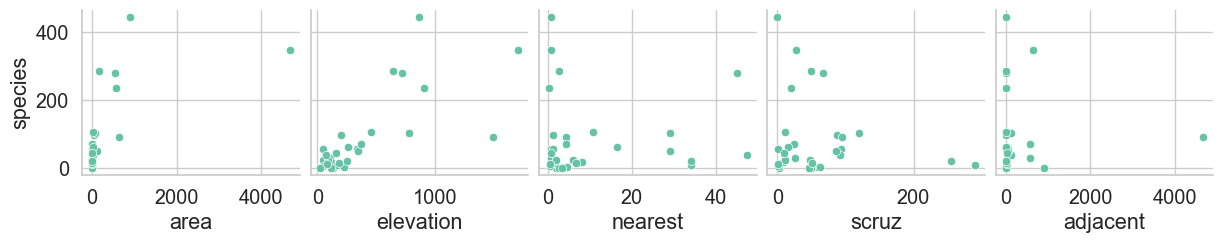

In [4]:
sns.pairplot(df, y_vars='species', x_vars=df.columns.drop(['species', 'island']))

Прорисовывается линейная зависимость от elevation. Для остальных линейной зависимости на глаз не видно

Построим распределния для каждого признака, чтобы определить, какое преобразование лучше применить

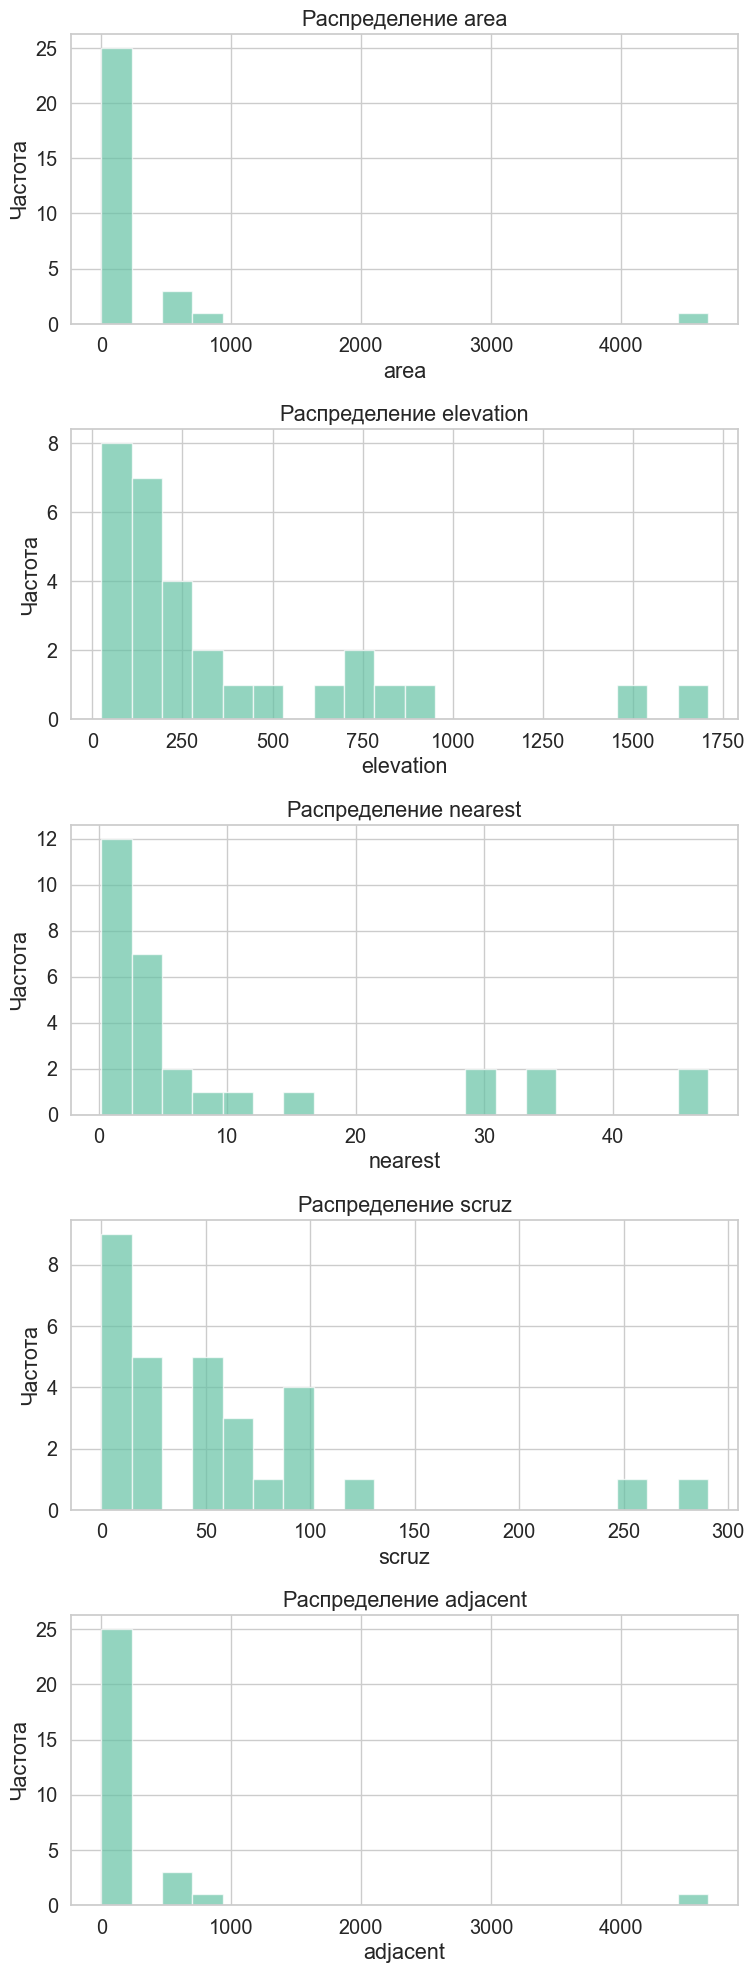

In [6]:
predictors = ['area', 'elevation', 'nearest', 'scruz', 'adjacent']
fig, axes = plt.subplots(len(predictors), 1, figsize=(8, 20))

for i, predictor in enumerate(predictors):
    axes[i].hist(df[predictor], bins=20, alpha=0.7)
    axes[i].set_title(f"Распределение {predictor}")
    axes[i].set_xlabel(predictor)
    axes[i].set_ylabel('Частота')

plt.tight_layout()
plt.show()

Применим преобразование Бокса-Кокса. Проверим, что нет неположитеьных значений

In [7]:
# Проверка наличия нулевых или отрицательных значений в указанных признаках
zero_negative_check = {col: (df[col] <= 0).sum() for col in ['area', 'nearest', 'scruz', 'adjacent']}

# Вывод количества нулевых или отрицательных значений для каждого признака
zero_negative_check


{'area': 0, 'nearest': 0, 'scruz': 1, 'adjacent': 0}

In [9]:
df['scruz'] = df['scruz'].replace(0, 1e-6)

In [10]:
# Проверка наличия нулевых или отрицательных значений в указанных признаках
zero_negative_check = {col: (df[col] <= 0).sum() for col in ['area', 'nearest', 'scruz', 'adjacent']}

# Вывод количества нулевых или отрицательных значений для каждого признака
zero_negative_check

{'area': 0, 'nearest': 0, 'scruz': 0, 'adjacent': 0}

In [ ]:
from scipy.stats import boxcox

# Применение Бокса-Кокса к признакам, добавляя небольшой сдвиг для положительности
df_transformed_bc = df.copy()
boxcox_transformed_columns = {}

for col in ['area', 'nearest', 'scruz', 'adjacent']:
    shifted_col = df[col] + 1e-6  # Сдвиг для положительности
    bc_transformed, lambda_value = boxcox(shifted_col)
    data_transformed_bc[f'boxcox_{col}'] = bc_transformed
    boxcox_transformed_columns[col] = lambda_value

# Вывод значений параметров λ
boxcox_transformed_columns



{'area': -0.029015684193536635,
 'nearest': -0.056561487441423516,
 'scruz': 0.27787227732228215,
 'adjacent': -0.06241395879484782}

In [16]:
df_transformed_bc.head()

,island,species,area,elevation,nearest,scruz,adjacent,boxcox_area,boxcox_nearest,boxcox_scruz,boxcox_adjacent
0,Baltra,58,25.09,332,0.6,0.600000,1.840000,3.076403,-0.518275,-0.476226,0.598309
1,Bartolome,31,1.24,109,0.6,26.299999,572.330017,0.214442,-0.518275,5.328545,5.242457
2,Caldwell,3,0.21,114,2.8,58.700001,0.780000,-1.596518,1.000212,7.559839,-0.250397
3,Champion,25,0.10,46,1.9,47.400002,0.180000,-2.381236,0.630343,6.916172,-1.809921
4,Coamano,2,1.05,130,1.9,1.900000,903.820007,0.048757,0.630343,0.702653,5.545526


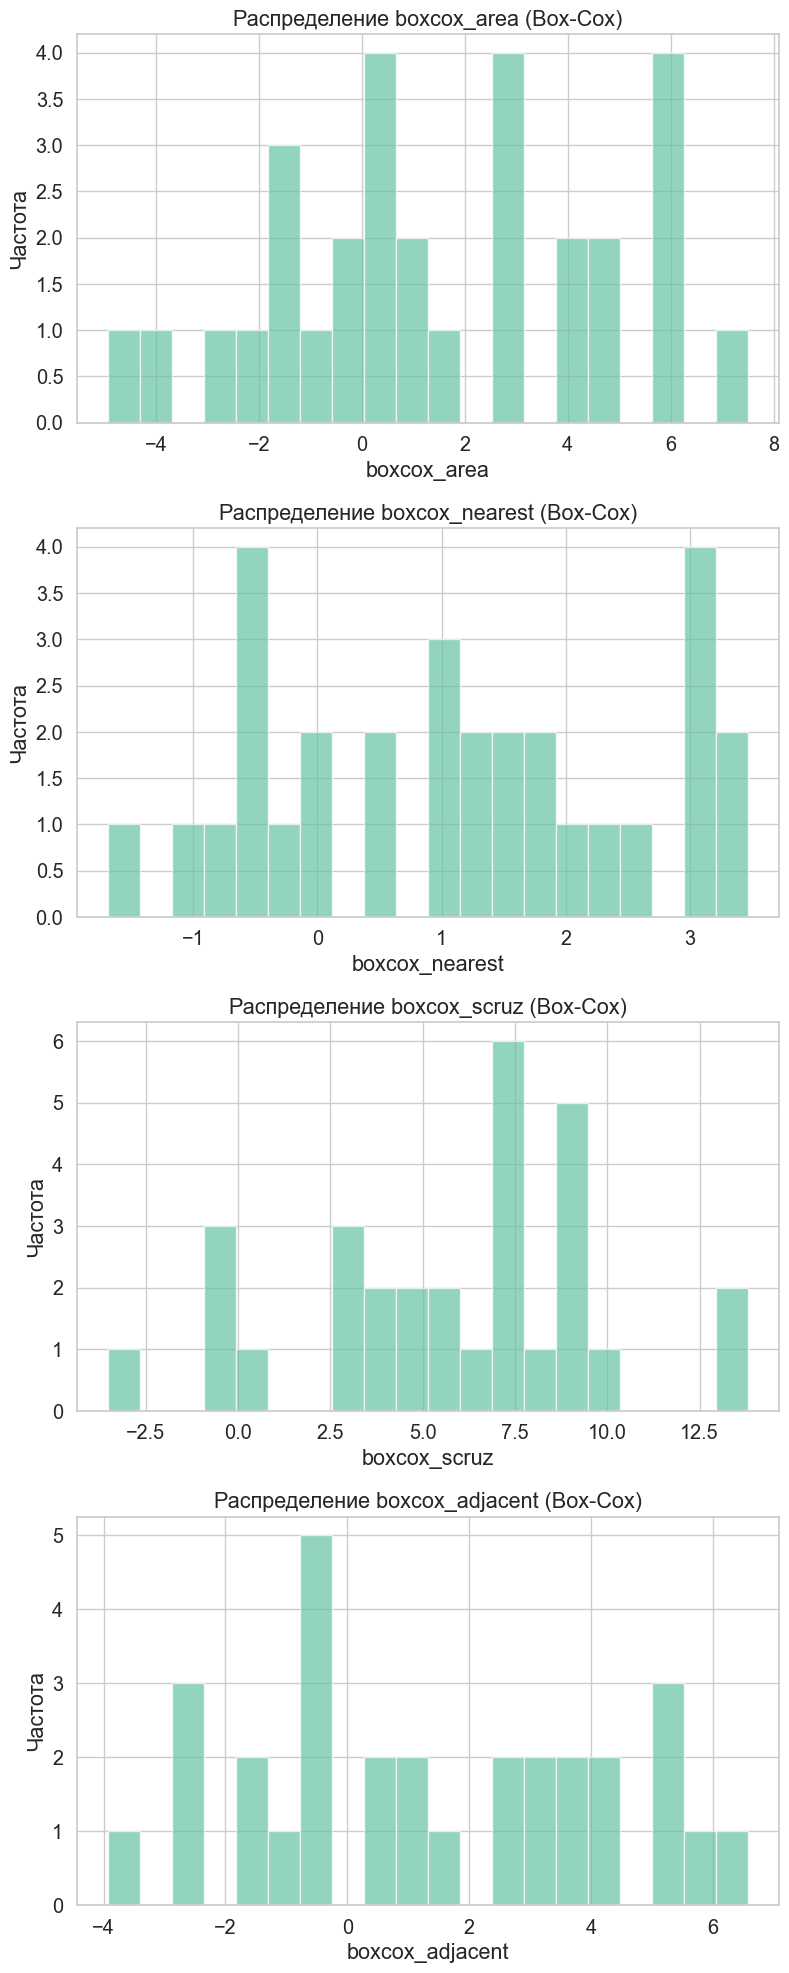

In [14]:
# Построение распределений преобразованных предикторов
boxcox_predictors = [f'boxcox_{col}' for col in ['area', 'nearest', 'scruz', 'adjacent']]

fig, axes = plt.subplots(len(boxcox_predictors), 1, figsize=(8, 20))

for i, predictor in enumerate(boxcox_predictors):
    axes[i].hist(df_transformed_bc[predictor], bins=20, alpha=0.7)
    axes[i].set_title(f"Распределение {predictor} (Box-Cox)")
    axes[i].set_xlabel(predictor)
    axes[i].set_ylabel('Частота')

plt.tight_layout()
plt.show()

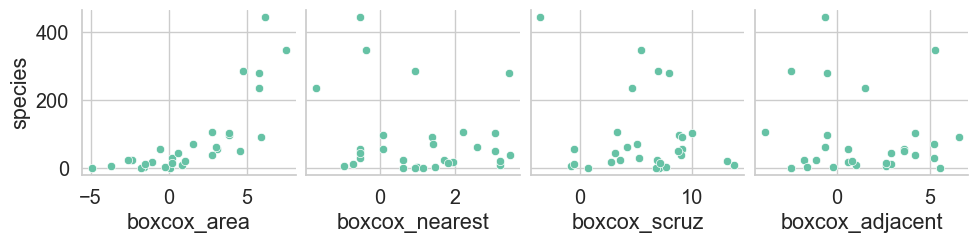

In [18]:
sns.pairplot(df_transformed_bc, y_vars='species', x_vars=df_transformed_bc[boxcox_predictors])

Теперь еще видим экспоненциальную зависимость от area

Обучите пуассоновскую регрессию по всем признакам. Регрессию можно сделать функцией `glm`, указав конкретный тип семейства как `family = sm.families.Poisson()`. Напечатайте `summary` модели.

In [33]:
model = GLM(df_transformed_bc['species'], df_transformed_bc[boxcox_predictors + ['elevation']], family=sm.families.Poisson())
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                species   No. Observations:                   30
Model:                            GLM   Df Residuals:                       25
Model Family:                 Poisson   Df Model:                            4
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1328.1
Date:                Mon, 02 Dec 2024   Deviance:                       2495.4
Time:                        18:45:45   Pearson chi2:                 2.26e+04
No. Iterations:                     8   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
boxcox_area         0.9623      0.021     46.482      0.000       0.922       1.003
boxcox_nearest     -0.0283      0.017     -1.707      0.088      -0.061       0.004
boxcox_scruz        0.1034      0.007     14.675      0.000       0.090       0.117
boxcox_adjacent    -0.1926      0.013    -14.724      0.000      -0.218      -0.167
elevation          -0.0004      0.000     -2.983      0.003      -0.001      -0.000
===================================================================================
"""

Оставьте только значимые признаки, обучите модель еще раз и проинтерпретируйте полученные результаты. Какой смысл имеют коэффициенты модели?

Все признаки получились значимыми. Чем больше по модулю коэффициент, тем больше его значимость

При использовании статистических свойств необходимо выполнить проверку предположений модели. Аналогом гомоскедастичности для гауссовской линейной модели в случае пуассоновской регрессии является равенство математического ожидания и дисперсии (это свойство пуассоновского распределения).

Аналогично гауссовской линейной модели можно определить устойчивые оценки дисперсии. Посчитайте и напечатайте ковариационную матрицу оценок коэффициентов модели с помощью функции `cov_params`, рассмотрев тип оценки `HC3`.

In [34]:
model.fit(cov_params='HC3').cov_params()

,boxcox_area,boxcox_nearest,boxcox_scruz,boxcox_adjacent,elevation
boxcox_area,0.000429,-4.825744e-05,-4.930559e-05,0.000185,-2.418343e-06
boxcox_nearest,-0.000048,2.757239e-04,-7.115916e-05,0.000019,4.253780e-07
boxcox_scruz,-0.000049,-7.115916e-05,4.965030e-05,-0.000026,1.183483e-07
boxcox_adjacent,0.000185,1.875216e-05,-2.605899e-05,0.000171,-1.238161e-06
elevation,-0.000002,4.253780e-07,1.183483e-07,-0.000001,1.515444e-08


Напечатайте таблицу статистических свойств оценок коэффициентов и доверительные интервалы.

In [35]:
model.fit(cov_params='HC3').summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                species   No. Observations:                   30
Model:                            GLM   Df Residuals:                       25
Model Family:                 Poisson   Df Model:                            4
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1328.1
Date:                Mon, 02 Dec 2024   Deviance:                       2495.4
Time:                        18:49:11   Pearson chi2:                 2.26e+04
No. Iterations:                     8   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
boxcox_area         0.9623      0.021     46.482      0.000       0.922       1.003
boxcox_nearest     -0.0283      0.017     -1.707      0.088      -0.061       0.004
boxcox_scruz        0.1034      0.007     14.675      0.000       0.090       0.117
boxcox_adjacent    -0.1926      0.013    -14.724      0.000      -0.218      -0.167
elevation          -0.0004      0.000     -2.983      0.003      -0.001      -0.000
===================================================================================
"""

In [36]:
model.fit(cov_params='HC3').conf_int()

,0,1
boxcox_area,0.921747,1.002902
boxcox_nearest,-0.060887,0.004204
boxcox_scruz,0.089595,0.117216
boxcox_adjacent,-0.218250,-0.166972
elevation,-0.000609,-0.000126


In [38]:
df_transformed_bc.head()

,island,species,area,elevation,nearest,scruz,adjacent,boxcox_area,boxcox_nearest,boxcox_scruz,boxcox_adjacent
0,Baltra,58,25.09,332,0.6,0.600000,1.840000,3.076403,-0.518275,-0.476226,0.598309
1,Bartolome,31,1.24,109,0.6,26.299999,572.330017,0.214442,-0.518275,5.328545,5.242457
2,Caldwell,3,0.21,114,2.8,58.700001,0.780000,-1.596518,1.000212,7.559839,-0.250397
3,Champion,25,0.10,46,1.9,47.400002,0.180000,-2.381236,0.630343,6.916172,-1.809921
4,Coamano,2,1.05,130,1.9,1.900000,903.820007,0.048757,0.630343,0.702653,5.545526


Придумайте на Галапагосском архипелаге еще один остров, задайте ему некоторые характеристики и назовите своим именем. Оцените, в каком интервале лежит ожидаемое количество видов растений на этом острове.

*Указание.* Воспользуйтесь функцией <a href="https://www.statsmodels.org/stable/generated/statsmodels.genmod.generalized_linear_model.GLMResults.get_prediction.html">get_prediction</a> от `GLMResults`. Данная функция возвращает объект <a href="https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.PredictionResults.html">`PredictionResults`</a>, у которого можно вызвать метод `conf_int`.

In [40]:
new_row = pd.DataFrame({
    'island': ['Dina'],
    'species': [np.nan],
    'boxcox_area': [5.0],
    'elevation': [47.2],
    'boxcox_nearest': [-1.88],
    'boxcox_scruz': [6.69],
    'boxcox_adjacent': [5.53]
})

df_transformed_bc_plus_my = pd.concat([df_transformed_bc, new_row], ignore_index=True)

Наконец, предложите способ получения предсказательного интервала для количества растений на вашем острове. Постройте его

In [41]:
model.fit().get_prediction(df_transformed_bc_plus_my[df_transformed_bc_plus_my.island == 'Dina'].drop(['species', 'island', 'scruz', 'area', "nearest", 'adjacent'], axis=1).to_numpy()).conf_int()

array([[1.37257040e+18, 7.98611004e+19]])

**Вывод:**

Пуассоновская регрессия — это подход, который хорошо подходит для моделирования количества видов (species) как неотрицательного дискретного отклика.
В данной задаче можно предположить, что количество видов зависит от следующих факторов:
area: больший размер острова способствует увеличению числа видов.
elevation: разнообразие высот может способствовать большему биоразнообразию.
nearest и scruz: расстояние до других островов ограничивает миграцию видов.
adjacent: соседние крупные острова могут служить источником видов.
Преобразования, такие как логарифмы и Бокс-Кокс, позволили лучше выровнять распределения признаков, что важно для корректной оценки коэффициентов регрессии.

---
### Задача P2.

Кардиотокография (КТГ) — непрерывная одновременная регистрация частоты сердечных сокращений плода и
тонуса матки с графическим изображением физиологических сигналов на калибровочной ленте. В настоящее
время КТГ является ведущим методом наблюдения за характером сердечной деятельности, который из-за
своей простоты в проведении, информативности и стабильности получаемой информации практически
полностью вытеснил из клинической практики фоно- и электрокардиографию плода.

Для облегчения задачи диагностики, результаты кардиотокографии некоторых эмбрионов были
классифицированы специалистами на нормальные и патологические. По показаниям приборов было
сгенерировано некоторое количество признаков.

**1.** Скачайте данные по ссылке: https://archive.ics.uci.edu/ml/datasets/cardiotocography.
Данные расположены в листе `Data`. Рассматриваемые нами признаки указаны в листе Description в колонке Features. Целевой меткой является столбец `NSP`. Для анализа мы не будем рассматривать данные, целевой меткой которой является `Suspect`.

In [43]:
data = pd.read_excel('CTG.xls', sheet_name='Data', skiprows=1)
data = data.drop(data.columns[data.columns.str.contains('Unnamed')], axis=1)
data = data[data.NSP != 2]
data.NSP[data.NSP == 3] = 0
data.head()

,b,e,AC,FM,UC,DL,DS,DP,DR,LB,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
1,5.0,632.0,4.0,0.0,4.0,2.0,0.0,0.0,0.0,132.0,...,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,6.0,1.0
2,177.0,779.0,2.0,0.0,5.0,2.0,0.0,0.0,0.0,133.0,...,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,6.0,1.0
3,411.0,1192.0,2.0,0.0,6.0,2.0,0.0,0.0,0.0,134.0,...,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,6.0,1.0
4,533.0,1147.0,4.0,0.0,5.0,0.0,0.0,0.0,0.0,132.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,2.0,1.0
5,0.0,953.0,1.0,0.0,10.0,9.0,0.0,2.0,0.0,134.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,8.0,0.0


In [45]:
description = pd.read_excel('CTG.xls', sheet_name='Description', skiprows=5)
features = data[description['Features'][description['Features'].notna()]].columns
target = 'NSP'

**2.** Проведите визуальный анализ данных. Какие признаки лучше всего разделяют классы?

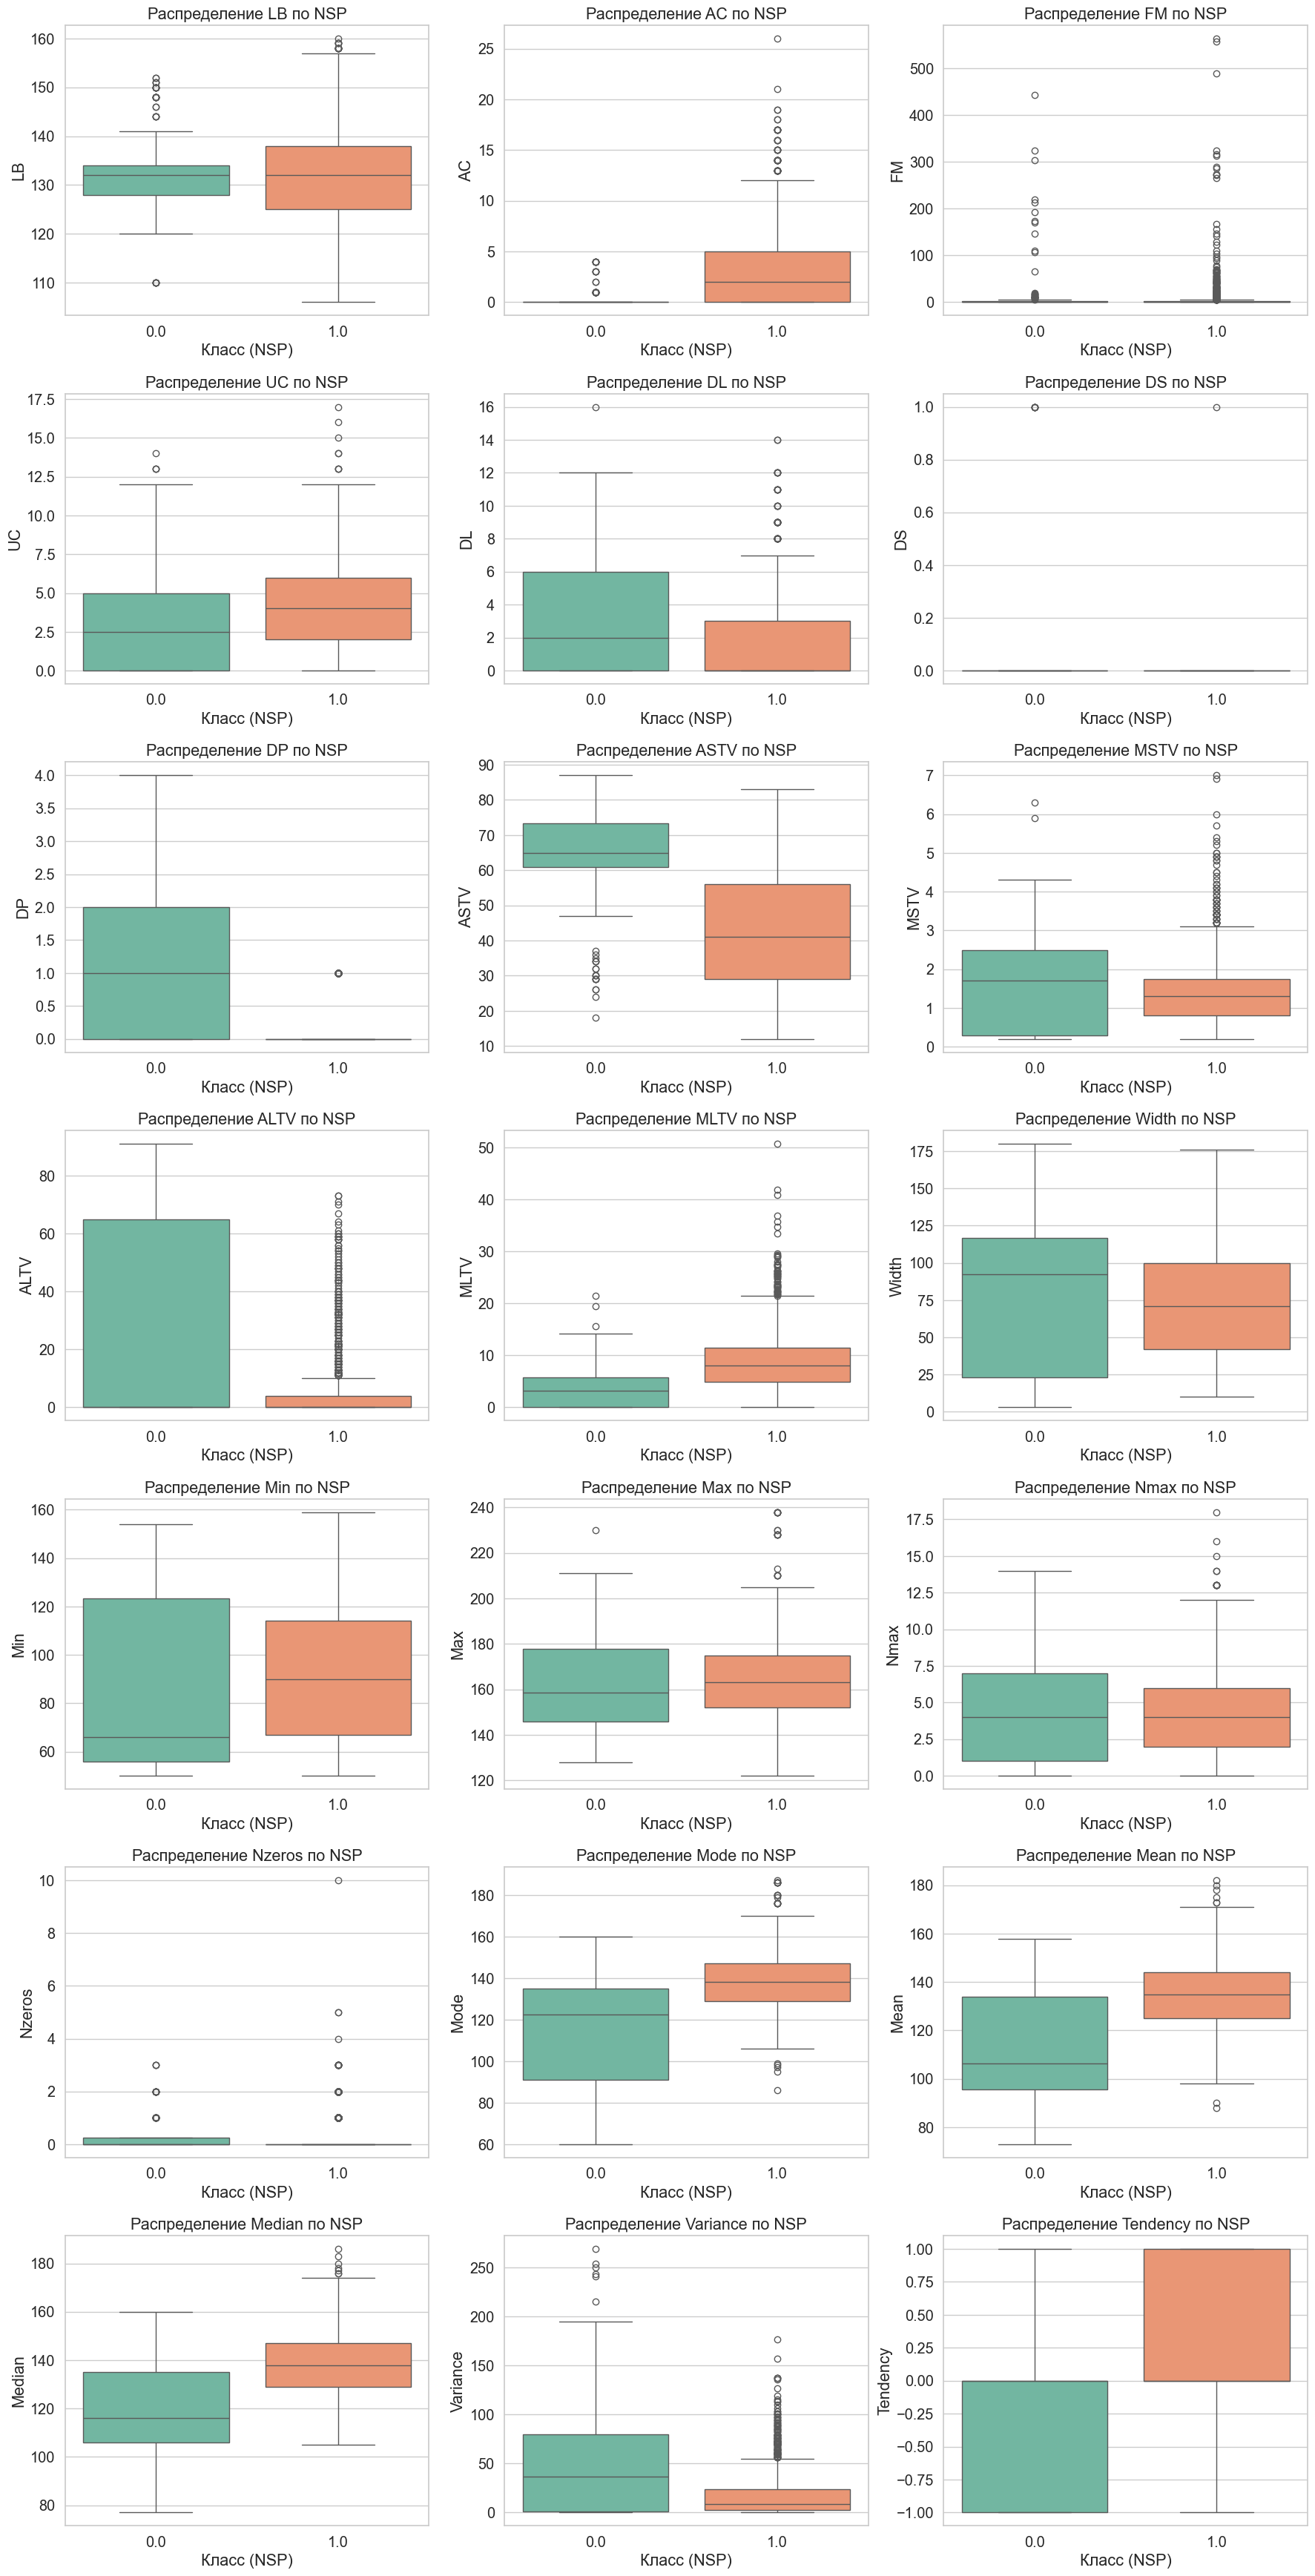

In [49]:
num_features = len(features)
rows = (num_features + 2) // 3  # Количество строк (по 3 графика в строке)
fig, axes = plt.subplots(rows, 3, figsize=(18, 5 * rows))  # Задаём размеры

# Упрощаем оси для удобной итерации
axes = axes.flatten()

# Построение графиков
for i, feature in enumerate(features):
    sns.boxplot(ax=axes[i], x=target, y=feature, data=data, palette="Set2")
    axes[i].set_title(f"Распределение {feature} по {target}")
    axes[i].set_xlabel("Класс (NSP)")
    axes[i].set_ylabel(feature)

# Удаление лишних подграфиков, если их больше, чем признаков
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Подгоняем расположение
plt.tight_layout()
plt.show()

Если диапазоны значений для классов (ящики и "усы") практически не перекрываются, то этот признак хорошо разделяет классы.

Если диапазон значений (размер ящика) для каждого класса узкий, это признак хорошей согласованности данных. Чем меньше внутриклассовая дисперсия, тем лучше разделение.

Если медианы (линии внутри ящиков) значительно различаются между классами, это сильный индикатор того, что признак хорошо разделяет классы.

Если "усы" (экстремальные значения) классов почти не пересекаются, это тоже указывает на высокую разделительную способность признака.

Итак, в результате визуального анализа:
AC, ASTV, MLTV, Mean возможно, Tendency


**3.** Разделите выборку на обучающую и тестовую часть случайным образом в соотношении 4:1.

In [51]:
data = data.drop(data.iloc[-3:].index)
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

**4.** Обучите логистическую регрессию по всем признакам. Напечатайте `summary` модели.
В чем причины такого поведения модели? Какие выводы можно сделать? Что нужно сделать, чтобы это исправить?

In [52]:
model = GLM(y_train, X_train, family=sm.families.Binomial())
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                    NSP   No. Observations:                 1464
Model:                            GLM   Df Residuals:                     1444
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -43.063
Date:                Mon, 02 Dec 2024   Deviance:                       86.126
Time:                        19:34:37   Pearson chi2:                     480.
No. Iterations:                    18   Pseudo R-squ. (CS):             0.4373
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
LB            -0.2207      0.100     -2.216      0.027      -0.416      -0.025
AC             1.5869      0.611      2.596      0.009       0.389       2.785
FM            -0.0149      0.019     -0.779      0.436      -0.052       0.023
UC             1.1634      0.234      4.974      0.000       0.705       1.622
DL             0.1121      0.275      0.408      0.683      -0.426       0.651
DS            -6.5414   1.59e+04     -0.000      1.000   -3.13e+04    3.13e+04
DP            -4.8122      1.298     -3.706      0.000      -7.357      -2.267
ASTV          -0.1818      0.038     -4.776      0.000      -0.256      -0.107
MSTV           2.4736      1.145      2.161      0.031       0.230       4.717
ALTV          -0.0912      0.022     -4.149      0.000      -0.134      -0.048
MLTV          -0.0936      0.148     -0.631      0.528      -0.384       0.197
Width         -0.0237      0.012     -1.999      0.046      -0.047      -0.000
Min           -0.0760      0.028     -2.695      0.007      -0.131      -0.021
Max           -0.0997      0.029     -3.392      0.001      -0.157      -0.042
Nmax           0.5772      0.233      2.473      0.013       0.120       1.035
Nzeros        -1.3665      0.628     -2.177      0.029      -2.597      -0.136
Mode           0.1370      0.071      1.924      0.054      -0.003       0.277
Mean           0.1436      0.096      1.501      0.133      -0.044       0.331
Median         0.2132      0.108      1.976      0.048       0.002       0.425
Variance      -0.1028      0.027     -3.800      0.000      -0.156      -0.050
Tendency      -2.9238      0.934     -3.131      0.002      -4.754      -1.093
==============================================================================
"""

1. Качество модели:

Log-Likelihood: -43.063 — показатель, связанный с правдоподобием модели.
Deviance: 86.126 — мера несоответствия между предсказаниями модели и фактическими данными.
Pseudo R-squared (Cox & Snell): 0.4373 — указывает, что модель объясняет около 43.73% вариации в данных.
Pearson chi2: 480 — мера согласия модели с данными.

2. Значимые признаки (P < 0.05):

LB, AC, UC, DP, ASTV, MSTV, ALTV, Width, Min, Max, Nmax, Nzeros, Median, Variance, Tendency.
Эти признаки существенно влияют на предсказание класса NSP.

3. Незначимые признаки (P > 0.05):

FM, DL, DS, MLTV, Mode, Mean.
Их влияние на вероятность принадлежности к классу не является статистически значимым.

4. Наиболее важные признаки (по абсолютному значению коэффициентов):

Tendency (-2.9238), DP (-4.8122), AC (1.5869), UC (1.1634), MSTV (2.4736)

5. Значение 0.4373 — среднее качество модели. Является плохим результатом в задачах, где требуется высокая точность (у нас медицинские данные)

**5.** Проверьте модель на линейность по значимым признакам, используя сглаженные диаграммы рассеивания. Для избежания влияния выбросов стройте диаграммы в интервале от 0.05-квантили до 0.95-квантили по значениям каждого признака. В качестве ширины ядра берите треть этого диапазона. Какие выводы можно сделать?

In [53]:
signif_cols = ['LB', 'AC', 'UC', 'DP', 'ASTV', 'MSTV', 'ALTV', 'Width', 'Min', 'Max', 'Nmax', 'Nzeros', 'Mean', 'Median', 'Variance', 'Tendency']

In [ ]:
def plot_diagram(X, cols, y):
    plt.figure(figsize=(16, 8))
    for i, col in enumerate(cols):
        # Рассчёт квантилей
        q05 = np.quantile(X[col], 0.05)
        q95 = np.quantile(X[col], 0.95)
        h = (q95 - q05) / 3  # Ширина ядра

        # Построение сетки для оценки
        x_grid = np.linspace(q05, q95, 100)

        # Преобразование данных в numpy для совместимости
        x = X[col].to_numpy()
        y_array = y.to_numpy()

        # Фильтрация данных в пределах квантилей
        mask = (x >= q05) & (x <= q95)
        x_filtered = x[mask]
        y_filtered = y_array[mask]

        # Гауссовское ядро
        kernel = sps.norm(scale=h)

        # Значения ядра в точках выборки
        kernel_values = kernel.pdf(x_filtered[:, np.newaxis] - x_grid[np.newaxis, :])

        # Ядерная регрессия
        y_est = (y_filtered[:, np.newaxis] * kernel_values).sum(axis=0) / kernel_values.sum(axis=0)

        # Приближение логита по оценкам y_est
        l_sm = np.log(y_est / (1 - y_est))

        # Построение графика
        plt.subplot(4, 4, i + 1)
        plt.plot(x_grid, l_sm, lw=2)
        plt.xlabel(f'{col}')
        plt.ylabel('Прибл. логита')
        plt.title(f'Прибл. логита для {col}')

    plt.tight_layout()
    plt.show()


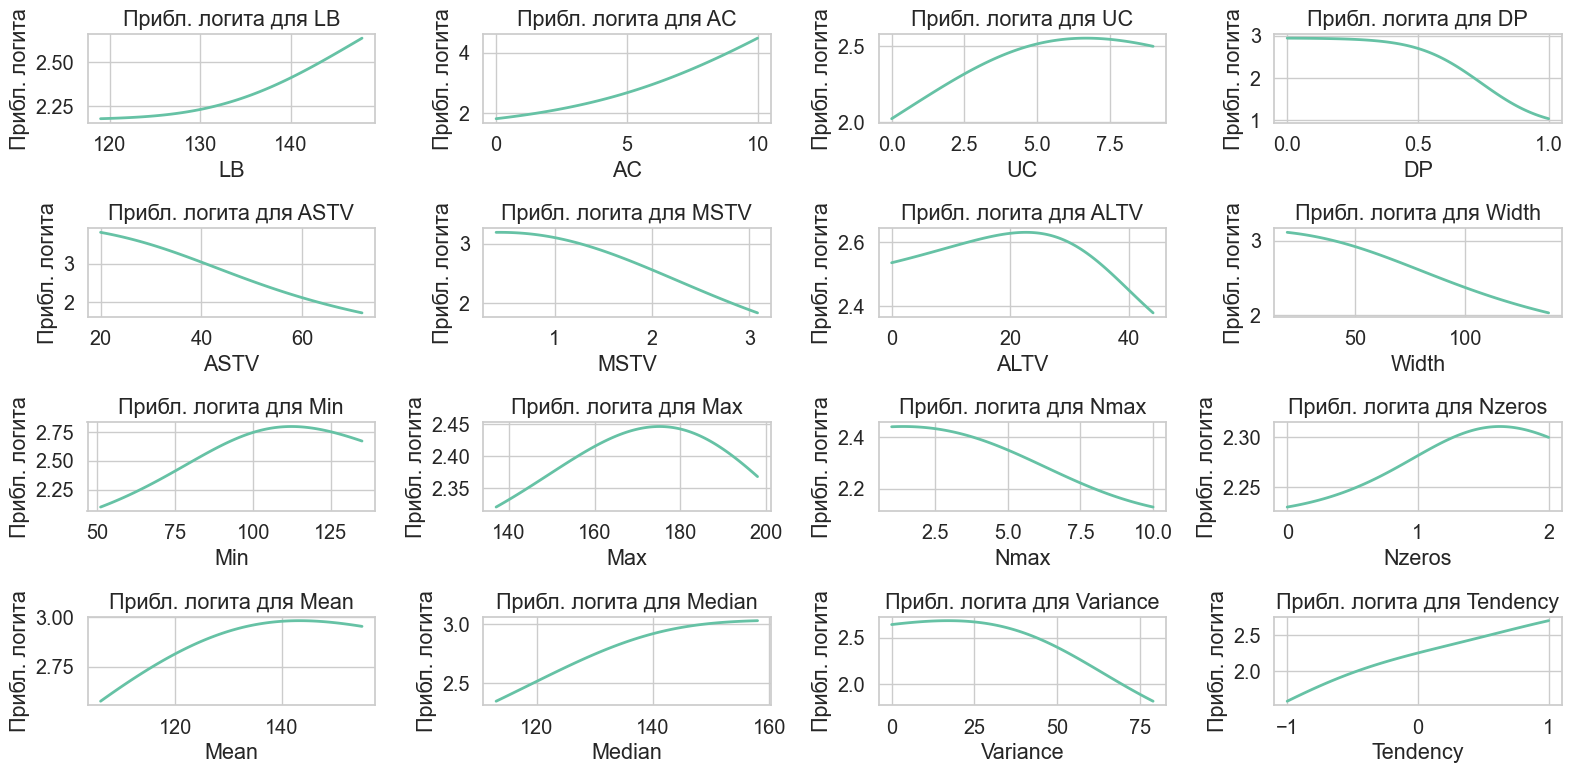

In [69]:
plot_diagram(X_train[signif_cols], signif_cols, y_train)

Видим линейную зависимость от ASTV, MSTV, Tendency, AC с натяжкой

**6.** Можно ли для каких-то из признаков, по которым не подтвердилась линейность модели, добиться линейности с помощью преобразований? В качестве преобразований можно использовать логарифмирование, возведение в квадрат, взятие модуля, сдвиг, введение нескольких признаков и т.д..

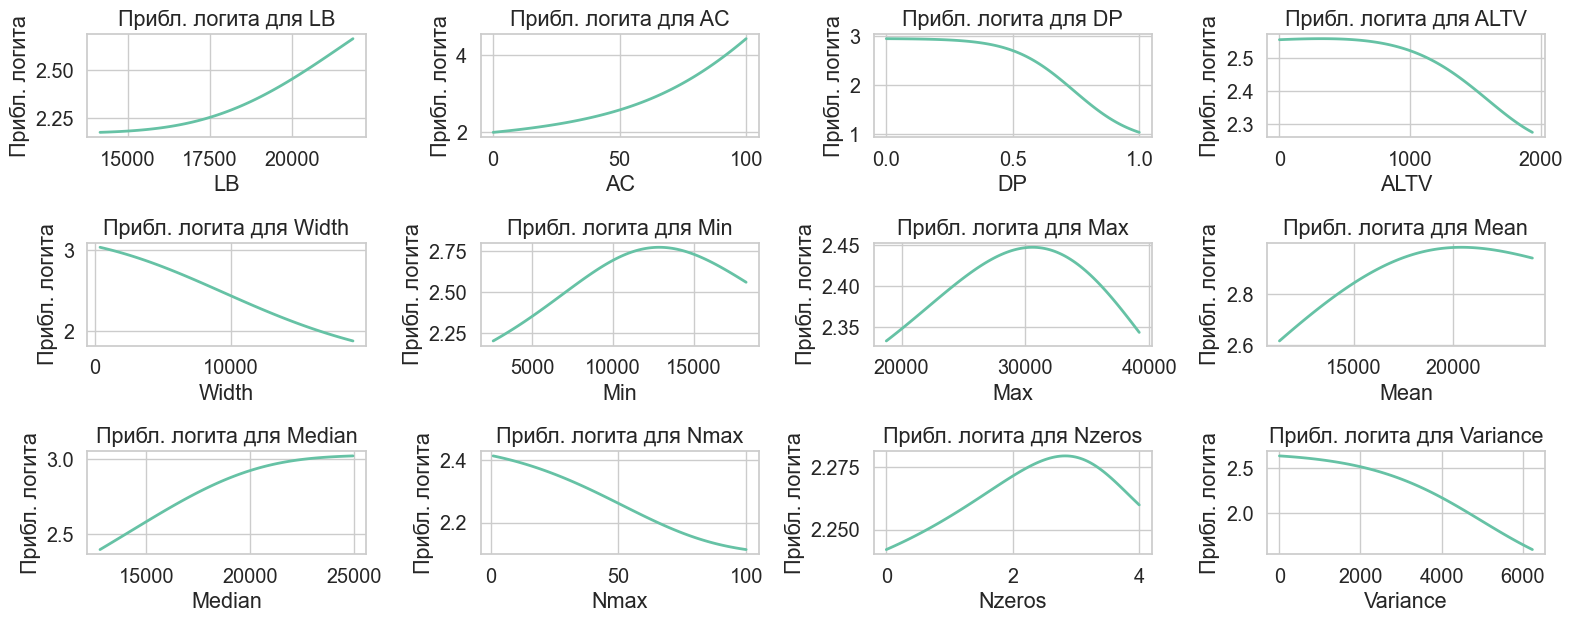

In [75]:
cols = ['LB', 'AC', 'DP', 'ALTV', 'Width', 'Min', 'Max', 'Mean', 'Median', 'Nmax', 'Nzeros', 'Variance']
plot_diagram((X_train[cols])**2, cols, y_train)

Width и Nmax стали линейными при возведении в квадрат

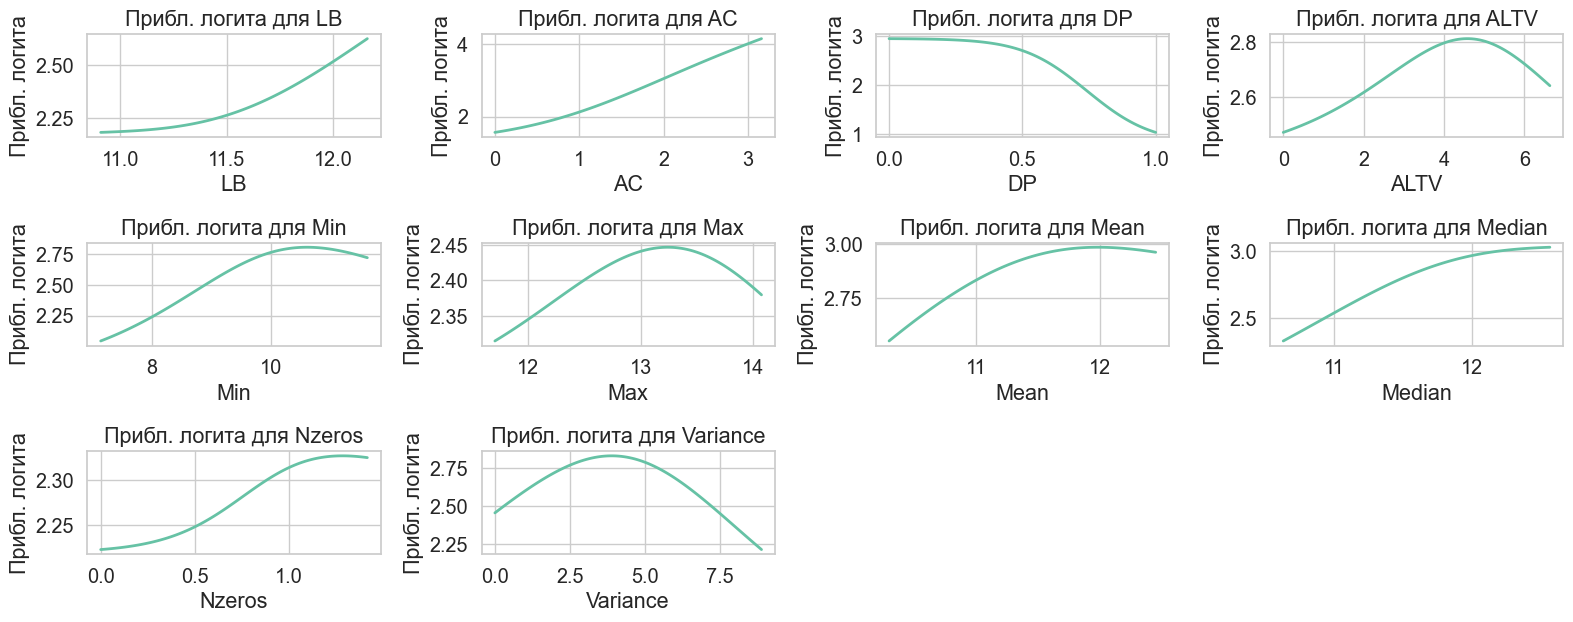

In [76]:
cols = ['LB', 'AC', 'DP', 'ALTV', 'Min', 'Max', 'Mean', 'Median', 'Nzeros', 'Variance']
plot_diagram(np.sqrt(X_train[cols]), cols, y_train)

AC стала линейно при извлечении корня

**7.** Оставьте только значимые и преобразованные признаки, обучите модель еще раз и проинтерпретируйте полученные результаты. Какой смысл имеют коэффициенты модели?

In [90]:
new_cols = ['ASTV', 'MSTV', 'Tendency']
square_cols = ['Width', 'Nmax']
sqrt_cols = ['AC']
X_train_new = X_train[new_cols]
X_test_new = X_test[new_cols]
for col in square_cols:
    X_train_new[col] = np.square(X_train[col])  # Возведение в квадрат
    X_test_new[col] = np.square(X_test[col])

for col in sqrt_cols:
    X_train_new[col] = np.sqrt(X_train[col])  # Квадратный корень
    X_test_new[col] = np.sqrt(X_test[col])

In [91]:
X_train_new.head()

,ASTV,MSTV,Tendency,Width,Nmax,AC
1385,28.0,1.3,1.0,4489.0,9.0,0.000000
414,59.0,0.6,0.0,13924.0,9.0,1.414214
1601,19.0,2.2,1.0,2025.0,9.0,0.000000
1434,38.0,0.9,0.0,2304.0,1.0,3.162278
1483,51.0,0.6,1.0,625.0,1.0,0.000000


In [92]:
model_new = GLM(y_train, X_train_new, family=sm.families.Binomial())
model_new.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                    NSP   No. Observations:                 1464
Model:                            GLM   Df Residuals:                     1458
Model Family:                Binomial   Df Model:                            5
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -340.08
Date:                Mon, 02 Dec 2024   Deviance:                       680.16
Time:                        23:26:39   Pearson chi2:                 1.07e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.1557
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ASTV           0.0014      0.003      0.561      0.575      -0.004       0.006
MSTV           0.9718      0.138      7.052      0.000       0.702       1.242
Tendency       1.4309      0.158      9.033      0.000       1.120       1.741
Width         -0.0002   2.58e-05     -6.011      0.000      -0.000      -0.000
Nmax           0.0027      0.004      0.630      0.528      -0.006       0.011
AC             2.1511      0.191     11.247      0.000       1.776       2.526
==============================================================================
"""

p-value у ASTV и Nmax больше 0.5, удалим их

In [99]:
X_train_new = X_train_new.drop(['ASTV', 'Nmax'], axis=1)
X_test_new = X_test_new.drop(['ASTV', 'Nmax'], axis=1)

In [100]:
model_new = GLM(y_train, X_train_new, family=sm.families.Binomial())
model_new.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                    NSP   No. Observations:                 1464
Model:                            GLM   Df Residuals:                     1460
Model Family:                Binomial   Df Model:                            3
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -340.43
Date:                Mon, 02 Dec 2024   Deviance:                       680.87
Time:                        23:32:35   Pearson chi2:                 1.14e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.1553
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
MSTV           1.0139      0.121      8.402      0.000       0.777       1.250
Tendency       1.4476      0.157      9.247      0.000       1.141       1.754
Width         -0.0001   2.14e-05     -6.883      0.000      -0.000      -0.000
AC             2.1616      0.189     11.432      0.000       1.791       2.532
==============================================================================
"""

**8.** Для некоторых объектов из тестовой выборки оцените вероятность наличия патологии. Постройте также доверительный интервал уровня доверия 0.95 для этой вероятности.

*Указание.* Воспользуйтесь функцией <a href="https://www.statsmodels.org/stable/generated/statsmodels.genmod.generalized_linear_model.GLMResults.get_prediction.html">get_prediction</a> от `GLMResults`. Данная функция возвращает объект <a href="https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.PredictionResults.html">`PredictionResults`</a>, у которого можно вызвать метод `conf_int`.

Проинтерпретируйте границы полученных доверительных интервалов. Как их можно использовать в медицине?

In [103]:
model_new.fit().get_prediction(X_test_new.iloc[:10, :]).conf_int()

array([[0.93281103, 0.97039936],
       [0.98550825, 0.99669308],
       [0.97007238, 0.99074914],
       [0.93896665, 0.98293994],
       [0.99736253, 0.99961132],
       [0.98770006, 0.99825277],
       [0.60134359, 0.66001841],
       [0.79199989, 0.87545975],
       [0.7630542 , 0.859128  ],
       [0.9975174 , 0.99956011]])

Длина интервала показывает, насколько модель уверена в ответе. В 10ом случае сильно уверена в наличии патологии, в 9ом поменьше.

**Вывод:**

Логистическая регрессия, применяемая в рамках обобщённых линейных моделей (GLM), подходит для задач классификации. Для её параметров и предсказаний можно определить доверительные интервалы, что упрощает интерпретацию полученных результатов.

---
### Задача P3.

Вам выдается сводная статистика о посетителях сайта miptstats.github.io за период с февраля по май этого года. В каждой ячейке таблицы записано количество посетителей определенного условия, которые хотя бы раз посетили сайт. Пол посетителя определяется технологией Яндекс.Метрики.

In [104]:
data = pd.DataFrame(
    {
        'Мужской': [3422, 1299, 367, 363, 61, 30],
        'Женский': [1303, 510, 189, 122, 28, 5]
    },
    index=[
        'Chrome', 'Яндекс Браузер', 'Edge', 'Opera', 'Safari', 'Firefox'
    ]
)
data

,Мужской,Женский
Chrome,3422,1303
Яндекс Браузер,1299,510
Edge,367,189
Opera,363,122
Safari,61,28
Firefox,30,5


Проверьте гипотезу о том, что тип используемого браузера не зависит от пола посетителя. Сделайте вывод.

In [105]:
from scipy.stats import chi2_contingency

# Применение критерия хи-квадрат
chi2, p, dof, expected = chi2_contingency(data)

# Вывод результатов
print(f"Хи-квадрат: {chi2:.2f}")
print(f"p-значение: {p:.4f}")
print(f"Степени свободы: {dof}")
print("Ожидаемые частоты:")
print(pd.DataFrame(expected, index=data.index, columns=data.columns))

# Интерпретация
alpha = 0.05
if p < alpha:
    print("Отвергаем нулевую гипотезу: тип браузера зависит от пола.")
else:
    print("Не удалось отвергнуть нулевую гипотезу: тип браузера не зависит от пола.")

Хи-квадрат: 16.09
p-значение: 0.0066
Степени свободы: 5
Ожидаемые частоты:
                    Мужской      Женский
Chrome          3401.214443  1323.785557
Яндекс Браузер  1302.179244   506.820756
Edge             400.227562   155.772438
Opera            349.119366   135.880634
Safari            64.065203    24.934797
Firefox           25.194181     9.805819
Отвергаем нулевую гипотезу: тип браузера зависит от пола.


---
### Задача P4.

Скачайте <a href="http://archive.ics.uci.edu/ml/datasets/Bank+Marketing">данные</a> маркетинговых кампаний португальского банковского учреждения. Цель задачи &mdash; с целью дальнейшего исследования понять, какие условия (среди 20 признаков) влияют на подписание клиентом срочного депозита (величина $y$). Выполните задачу двумя способами:

* методами анализа зависимостей, выяснив, какие характеристики клиента оказывают влияние на целевую переменную, и указав степень влияния;

* вычислив важность признаков, полученной с помощью Random Forest, разбив предварительно данные на обучающую и тестовую части.

Проинтерпретируйте полученные результаты.

*Напоминание*: в случае отбора признаков с целью дальнейшего исследования можно применять методы, контролирующие FDR на уровне не более 0.1.